In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
%matplotlib inline


In [3]:
#load the data into the notebook
data=open(r"C:\\Users\\ALVIN\\Downloads\\Mall_Customers.csv")
dt=pd.read_csv(data)

In [4]:
print(dt.shape),print(dt.describe)
print(dt.head(10))

(200, 5)
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>
   CustomerID  Gender  Age  Annual Income (k$)  Spending

In [5]:
print(dt.isnull().sum()),print(dt.dtypes)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


(None, None)

In [6]:
print(dt.describe)


<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [7]:
dt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

Female    112
Male       88
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

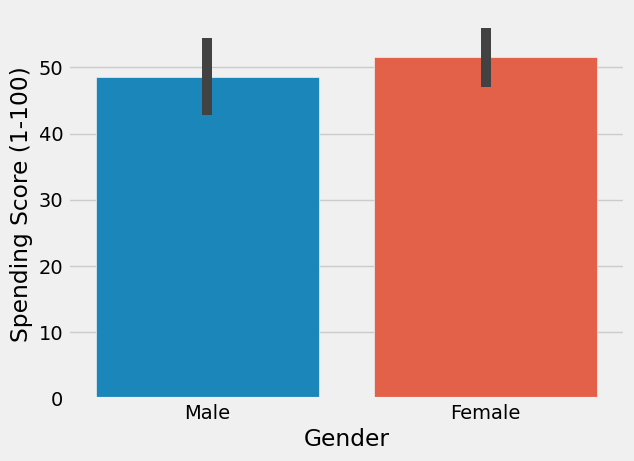

In [8]:
#VARIABLES EXPLORATION
print(dt['Gender'].value_counts())

sns.barplot(x = 'Gender', y = 'Spending Score (1-100)', data = dt)

In [9]:
print(f'unique values in age:', dt['Age'].nunique()), print(f'Max Age:' ,dt['Age'].max()),print(f'Min Age:' ,dt['Age'].min())

unique values in age: 51
Max Age: 70
Min Age: 18


(None, None, None)

C:\Users\ALVIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ALVIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ALVIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



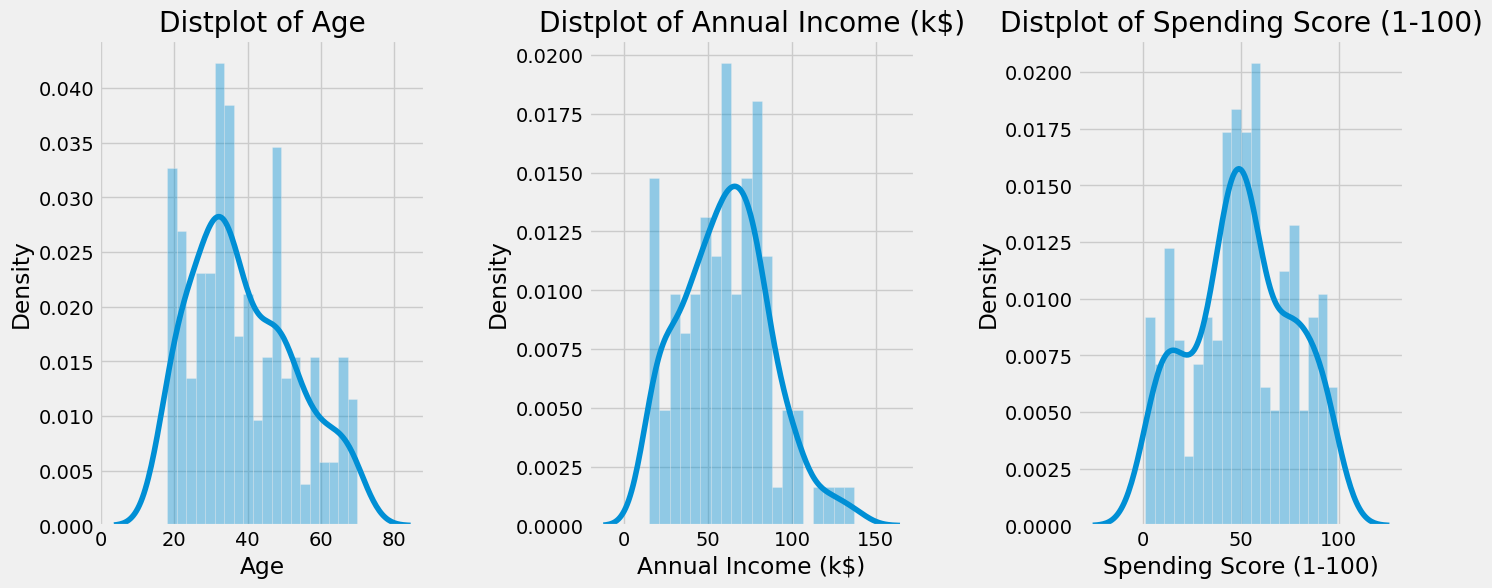

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dt[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<AxesSubplot:xlabel='count', ylabel='Gender'>

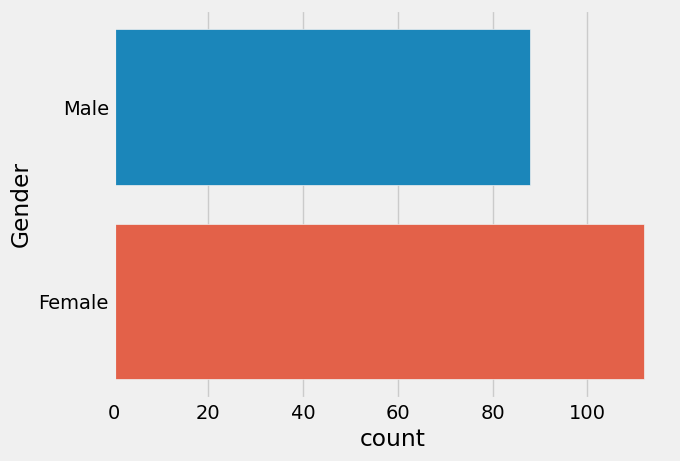

In [11]:
ct=(dt['Gender'].value_counts())
sns.countplot(y='Gender',data=dt)


In [12]:
dt['Gender'] = dt['Gender'].replace({'Male': 0, 'Female': 1}) # Replacing categorical values for numeric values
dt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


# KMEANS CLUSTERING

In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
from sklearn.cluster import KMeans # Importing KMeans model
X = dt[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # Selecting variables used for clustering
wss_values = [] # Creating an empty list to store the WSS values for each number of clusters

In [15]:
# Looping over a range of clusters and calculating the WSS for each number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k) # Initializing model 
    kmeans.fit(X) # Fitting model to the variables used for identifying patterns for clustering
    wss_values.append(kmeans.inertia_) 

C:\Users\ALVIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ALVIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ALVIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ALVIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

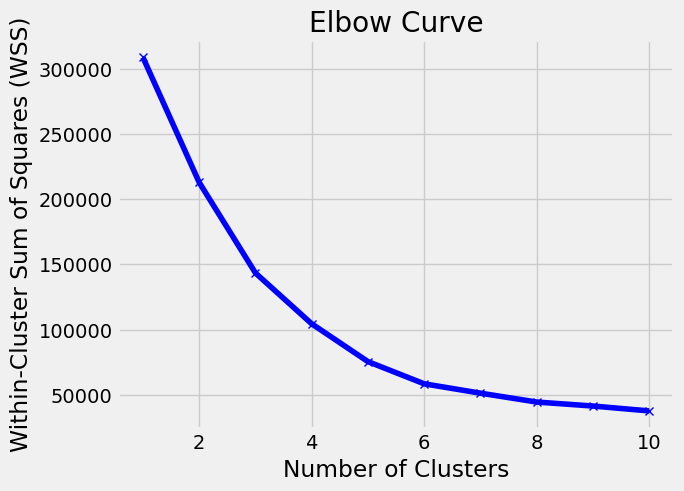

In [16]:
plt.plot(range(1, 11), wss_values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Curve')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4) # Initializing the model again with a defined number of clusters

kmeans.fit(X) # Fitting the model to the data

dt['Cluster'] = kmeans.labels_ # Adding the cluster labels to the dataframe 
# Visualize dataframe with the labels for each cluster
dt

C:\Users\ALVIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,2
3,4,1,23,16,77,3
4,5,1,31,17,40,2
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,0
197,198,0,32,126,74,1
198,199,0,32,137,18,0


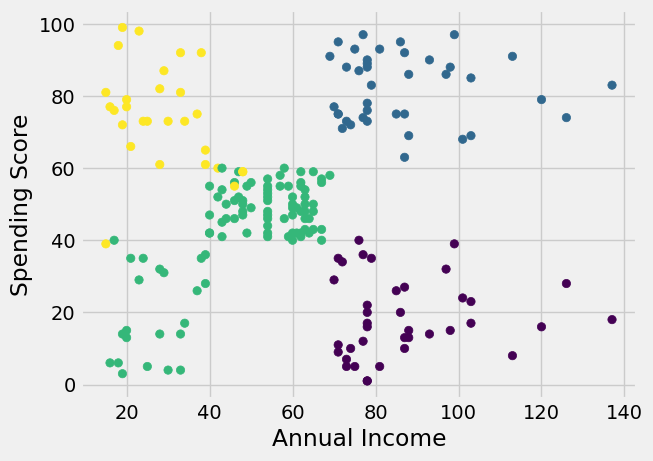

In [19]:
 #Visualizing clusters by comparing Spending Score and Annual Income
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=dt['Cluster'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Note: You can successfully see four different groups of customers on the plot above:

Blue Group: High Spending Score, Low Annual Income
Green Group: Low to Medium Spending Score, Low Annual Income
Yellow Group:Low Spending Score, Medium to High Annual Income
Purple Group: High Spending Score, Medium to High Annual Income